# Create dataset and model

In [53]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [54]:
# Read the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
# One-Hot encoding
insurance_one_hot = pd.get_dummies(insurance)

In [56]:
# Create x and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [57]:
# Create training an test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [58]:
# Build a neural network

# 1.Create the model
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# 3. Fit model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [59]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 10548.0518 - mae: 10548.0518


[10548.0517578125, 10548.0517578125]

# Improve the model

In [60]:
# Built improved model
tf.random.set_seed(42)

insurance_imp = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(1) 
])

insurance_imp.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae"])

history = insurance_imp.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=40, verbose=0)

In [61]:
# Evaluate the model
insurance_imp.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8626.8877 - mae: 8626.8877


[8626.8876953125, 8626.8876953125]

Text(0.5, 0, 'epochs')

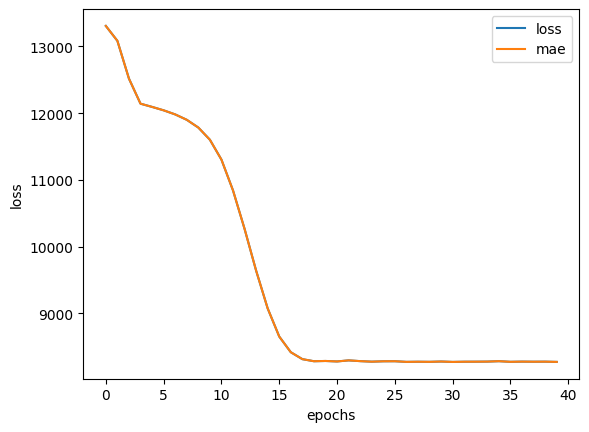

In [62]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#Preprocessing Data (Normalization and standarization)

In terms of scaling values, neural network tend to prefer normalization

In [63]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [64]:
# Create a column transformer
ct = make_column_transformer((MinMaxScaler(),["age", "bmi", "children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))



ct


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [65]:
# Create x and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Built our tain and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [66]:
# What does our data look like now?
X_train.loc[0] # What we had

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [67]:
X_train_normal[0] #What we have

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [68]:
# Built improved model
tf.random.set_seed(42)

insurance_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(300),
    tf.keras.layers.Dense(1) 
])

insurance_imp.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae"])

history = insurance_imp.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=40, verbose=0)



In [69]:
# Evaluate the model
insurance_imp.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8632.7188 - mae: 8632.7188


[8632.71875, 8632.71875]